In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
import pandas as pd

In [2]:
data_dir = Path('C:/Workspace/Data/MNIST')

f = gzip.open(data_dir/'train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 60000


f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

# image = np.asarray(data[2]).squeeze()
# plt.imshow(image)
# plt.show()


In [3]:
f = gzip.open(data_dir/'train-labels-idx1-ubyte.gz','r')
f.read(8)
# for i in range(0,5):
#     buf = f.read(1)
#     labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(labels)

buf = f.read(num_images)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
# print(labels)

In [4]:
X = np.asarray(data).squeeze()
y = labels
shape = (28, 28)

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
        ])


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                metrics=['accuracy'])

In [7]:
history = model.fit(
    X, y,
    batch_size=1000,
    epochs=150,
)

Train on 60000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 22us/sample - loss: 14.6212 - accuracy: 0.7790
Epoch 2/150
60000/60000 [==============================] - 1s 10us/sample - loss: 2.9711 - accuracy: 0.9025
Epoch 3/150
60000/60000 [==============================] - 1s 10us/sample - loss: 1.7570 - accuracy: 0.9248
Epoch 4/150
60000/60000 [==============================] - 1s 11us/sample - loss: 1.2118 - accuracy: 0.9373
Epoch 5/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.8948 - accuracy: 0.9470
Epoch 6/150
60000/60000 [==============================] - 1s 11us/sample - loss: 0.6626 - accuracy: 0.9546
Epoch 7/150
60000/60000 [==============================] - 1s 11us/sample - loss: 0.5263 - accuracy: 0.9615
Epoch 8/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4176 - accuracy: 0.9659
Epoch 9/150
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3326 - accuracy: 0.9707
Epoc

60000/60000 [==============================] - 1s 10us/sample - loss: 0.0364 - accuracy: 0.9952
Epoch 77/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0364 - accuracy: 0.9950
Epoch 78/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0274 - accuracy: 0.9958
Epoch 79/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0282 - accuracy: 0.9960
Epoch 80/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0254 - accuracy: 0.9968
Epoch 81/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0207 - accuracy: 0.9972
Epoch 82/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0287 - accuracy: 0.9959
Epoch 83/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0236 - accuracy: 0.9966
Epoch 84/150
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0239 - accuracy: 0.9969
Epoch 85/150
60000/60000 [======

60000/60000 [==============================] - 1s 10us/sample - loss: 0.0209 - accuracy: 0.9976


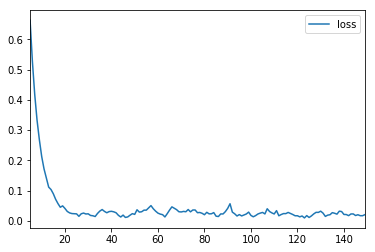

In [8]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [9]:
# test

f = gzip.open(data_dir/'t10k-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 10000


f.read(16)
buf = f.read(image_size * image_size * num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(num_images, image_size, image_size, 1)

# image = np.asarray(data_test[2]).squeeze()
# plt.imshow(image)
# plt.show()

In [11]:
f = gzip.open(data_dir/'t10k-labels-idx1-ubyte.gz','r')
f.read(8)
# for i in range(0,5):
#     buf = f.read(1)
#     labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(labels)

buf = f.read(num_images)
labels_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
# print(labels)

In [12]:
# predictions = model.predict(data_test)
test_loss, test_acc = model.evaluate(data_test,  labels_test)
print('\nTest accuracy:', test_acc)

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (10000, 28, 28, 1)